In [1]:
# Task 4: MNIST Handwritten Digit Classifier with Keras

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# -------------------- Step 1: Load Dataset --------------------
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [3]:
# -------------------- Step 2: Preprocess Data --------------------
# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode target labels
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense

# Recommended model architecture with Input layer
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
# -------------------- Step 4: Train the Model --------------------
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8133 - loss: 0.6544 - val_accuracy: 0.9608 - val_loss: 0.1374
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9555 - loss: 0.1530 - val_accuracy: 0.9702 - val_loss: 0.1038
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9696 - loss: 0.0980 - val_accuracy: 0.9740 - val_loss: 0.0933
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9786 - loss: 0.0713 - val_accuracy: 0.9753 - val_loss: 0.0871
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9833 - loss: 0.0571 - val_accuracy: 0.9780 - val_loss: 0.0770
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9864 - loss: 0.0457 - val_accuracy: 0.9770 - val_loss: 0.0800
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9885 - loss: 0.0394 - val_accuracy: 0.9808 - val_loss: 0.0732
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9917 - loss: 0.0305 - val_accuracy: 0.

In [7]:

# -------------------- Step 5: Evaluate on Test Data --------------------
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9690 - loss: 0.1050

Test Accuracy: 0.9739
Test Loss: 0.0902


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.99      0.96      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



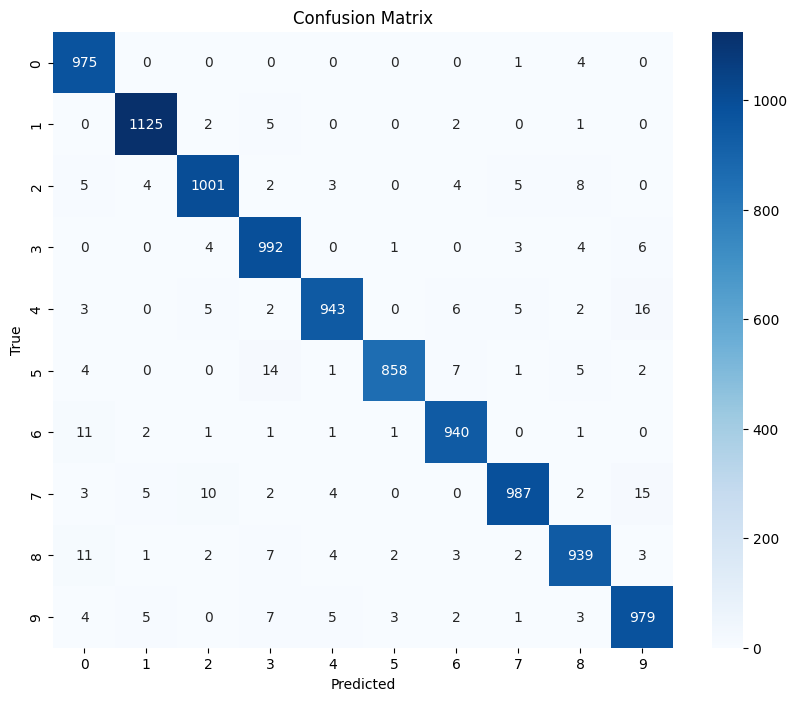

In [8]:
# -------------------- Step 6: Predictions and Confusion Matrix --------------------
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

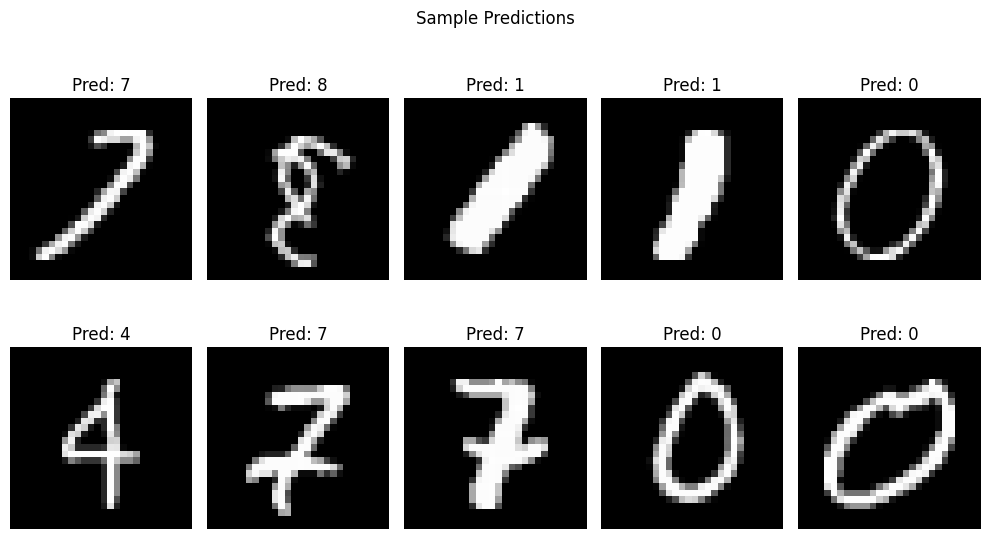

In [9]:
# -------------------- Step 7: Sample Predictions --------------------
plt.figure(figsize=(10, 6))
for i in range(10):
    idx = np.random.randint(0, len(X_test))
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"Pred: {y_pred[idx]}")
    plt.axis('off')
plt.suptitle("Sample Predictions")
plt.tight_layout()
plt.show()